In [36]:
"""
Load governance system test results from archived JSON files.

This cell imports the metrics from:
1. scenario_metrics.json - Contains results from multi-scenario governance simulations
   (execution counts, consent enforcement, ledger integrity, performance)
2. tamper_metrics.json - Contains results from off-ledger tampering detection tests
   (detection rates, false alarms, verification accuracy)

Both files were generated by the governance system tests and archived with timestamp.
"""
import json
import pandas as pd
import matplotlib.pyplot as plt

# Base directory with timestamp from test run
BASE= "results_20251219_195019"
SCENARIO_PATH = f"{BASE}/scenario_metrics.json"
TAMPER_PATH   = f"{BASE}/tamper_metrics.json"

# Load scenario results (list of dictionaries, one per scenario)
with open(SCENARIO_PATH, "r") as f:
    scenario_results = json.load(f)

# Load tamper detection results (single dictionary)
with open(TAMPER_PATH, "r") as f:
    tamper_results = json.load(f)

# Display both result sets for quick inspection
scenario_results, tamper_results

FileNotFoundError: [Errno 2] No such file or directory: 'results_20251219_195019/scenario_metrics.json'

In [ ]:
"""
Convert scenario results to pandas DataFrame for analysis.

Each row represents one simulation scenario with metrics like:
- executed: number of successful inferences
- blocked: number of blocked (unauthorized) inferences
- unauthorized_block_rate: effectiveness of access control
- post_revoke_exec: consent drift incidents (should be 0)
- avg_governance_ms_per_run: overhead per operation
- ledger_entries: audit trail completeness
- ledger_integrity_ok: whether hash chain is intact
"""
df = pd.DataFrame(scenario_results)
df

,executed,blocked,attempted_unauthorized,blocked_unauthorized,post_revoke_exec,events_expected,events_actual,governance_time_ms,ledger_integrity_ok_before,ledger_integrity_err_before,ledger_integrity_ok_after,ledger_integrity_err_after,unauthorized_block_rate,avg_governance_ms_per_run,ledger_entries,scenario
0,321,179,115,115,0,500,550,740.913865,True,None,True,None,1.0,1.481828,550,"{'n_patients': 50, 'n_runs': 500, 'revoke_prob..."
1,1140,860,411,411,0,2000,2236,8848.568242,True,None,True,None,1.0,4.424284,2236,"{'n_patients': 200, 'n_runs': 2000, 'revoke_pr..."


In [ ]:
"""
Generate statistical summary of key governance metrics.

Focuses on operational metrics:
- executed/blocked: volume statistics
- unauthorized_block_rate: security effectiveness (should be high ~1.0)
- post_revoke_exec: compliance violations (should be 0)
- avg_governance_ms_per_run: performance overhead (lower is better)
- ledger_entries: audit completeness (should match expected events)

The describe() function shows count, mean, std, min, quartiles, max
for each metric across all scenarios.
"""
summary_cols = [
    "executed",
    "blocked",
    "unauthorized_block_rate",
    "post_revoke_exec",
    "avg_governance_ms_per_run",
    "ledger_entries"
]

df[summary_cols].describe()

,executed,blocked,unauthorized_block_rate,post_revoke_exec,avg_governance_ms_per_run,ledger_entries
count,2.000000,2.000000,2.0,2.0,2.000000,2.000000
mean,730.500000,519.500000,1.0,0.0,2.953056,1393.000000
std,579.120454,481.539718,0.0,0.0,2.080631,1192.182033
min,321.000000,179.000000,1.0,0.0,1.481828,550.000000
25%,525.750000,349.250000,1.0,0.0,2.217442,971.500000
50%,730.500000,519.500000,1.0,0.0,2.953056,1393.000000
75%,935.250000,689.750000,1.0,0.0,3.688670,1814.500000
max,1140.000000,860.000000,1.0,0.0,4.424284,2236.000000


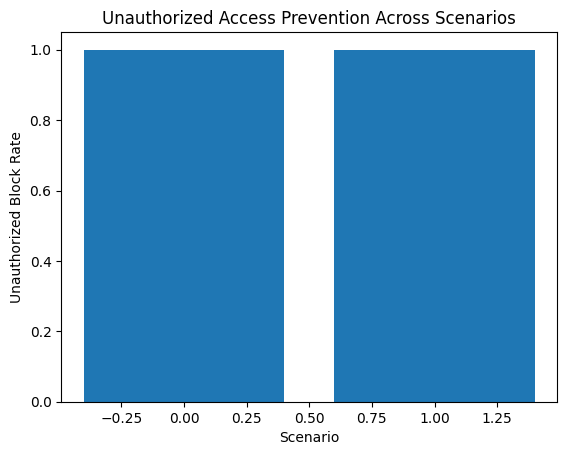

In [ ]:
"""
Visualize unauthorized access prevention across scenarios.

Bar chart showing how effectively the governance system blocked
unauthorized access attempts in each scenario.

Interpretation:
- High values (~1.0): System correctly blocks unauthorized users (good)
- Low values (<0.5): System allows unauthorized access (security issue)

This validates that consent enforcement and role-based access control
are working correctly.
"""
plt.figure()
plt.bar(
    range(len(df)),
    df["unauthorized_block_rate"]
)
plt.xlabel("Scenario")
plt.ylabel("Unauthorized Block Rate")
plt.title("Unauthorized Access Prevention Across Scenarios")
plt.show()

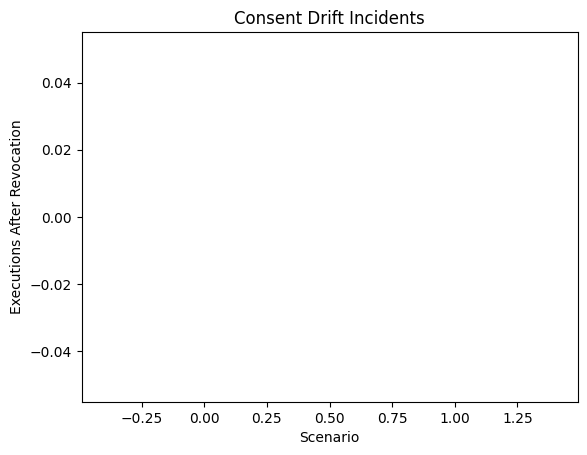

In [ ]:
"""
Visualize consent drift incidents (post-revocation executions).

Bar chart showing how many inferences executed AFTER consent was revoked
in each scenario. This is a critical compliance metric.

Interpretation:
- 0 executions: System correctly enforces revocations (correct behavior)
- >0 executions: Consent drift - system failed to block revoked consent (bug)

In a working system, all bars should be at zero.
This validates that consent revocation is immediately enforced.
"""
plt.figure()
plt.bar(
    range(len(df)),
    df["post_revoke_exec"]
)
plt.xlabel("Scenario")
plt.ylabel("Executions After Revocation")
plt.title("Consent Drift Incidents")
plt.show()

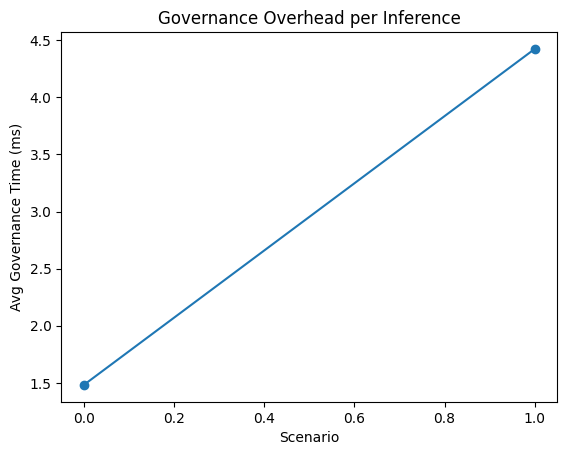

In [ ]:
"""
Visualize governance overhead across scenarios.

Line plot showing average time spent on governance operations
(consent checks, ledger writes, manifest storage) per inference.

Interpretation:
- Lower values: More efficient (better for real-time clinical use)
- Higher values: More overhead (may need optimization)
- Trend: Check if overhead increases with scale

This helps assess if the governance system is practical for
production deployment at clinical scale.
"""
plt.figure()
plt.plot(
    range(len(df)),
    df["avg_governance_ms_per_run"],
    marker="o"
)
plt.xlabel("Scenario")
plt.ylabel("Avg Governance Time (ms)")
plt.title("Governance Overhead per Inference")
plt.show()

In [ ]:
"""
Convert tamper detection results to DataFrame.

Creates a single-row DataFrame from the tampering test results.
This includes:
- total_inference_events: how many events were available
- sample_size: how many manifests were tested
- tampered: how many were intentionally corrupted
- detected_tamper: how many corruptions were caught
- missed_tamper: how many corruptions were missed
- false_alarms: legitimate manifests flagged as corrupted
- tamper_detection_rate: detected / tampered (should be ~1.0)
- false_alarm_rate: false_alarms / legitimate (should be ~0.0)
"""
tamper_df = pd.DataFrame([tamper_results])
tamper_df

,total_inference_events,sample_size,tampered,baseline_ok_before,detected_tamper,missed_tamper,false_alarms,tamper_detection_rate,false_alarm_rate
0,1140,200,50,200,50,0,0,1.0,0.0


In [ ]:
"""
Show key tampering detection metrics.

Focuses on the most important security metrics:
- tampered: how many manifests were corrupted in the test
- detected_tamper: how many corruptions were successfully detected
- tamper_detection_rate: detection effectiveness (ideally 1.0 = 100%)
- false_alarm_rate: false positive rate (ideally 0.0 = 0%)

A good governance system should have:
- Detection rate near 1.0 (catch all tampering)
- False alarm rate near 0.0 (no false positives)

This validates the integrity verification mechanism.
"""
tamper_df[[
    "tampered",
    "detected_tamper",
    "tamper_detection_rate",
    "false_alarm_rate"
]]

,tampered,detected_tamper,tamper_detection_rate,false_alarm_rate
0,50,50,1.0,0.0


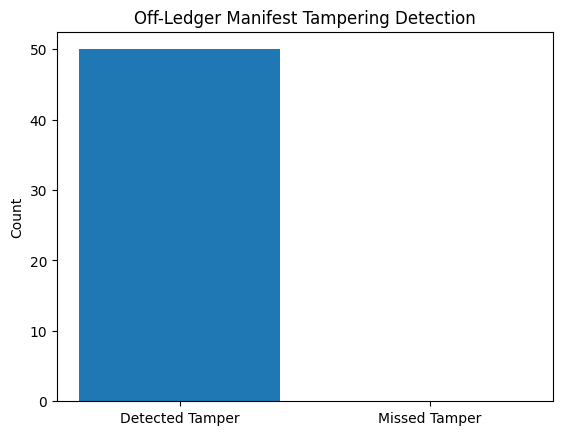

In [ ]:
"""
Visualize tampering detection effectiveness.

Bar chart comparing detected vs missed tampering attempts.

Interpretation:
- High "Detected" bar: System catches most tampering (good)
- High "Missed" bar: System misses tampering (security vulnerability)
- Ideal: All tampering detected, none missed

This provides visual confirmation that the hash-based verification
system successfully detects off-ledger manifest corruption.
"""
plt.figure()
plt.bar(
    ["Detected Tamper", "Missed Tamper"],
    [
        tamper_results["detected_tamper"],
        tamper_results["missed_tamper"]
    ]
)
plt.ylabel("Count")
plt.title("Off-Ledger Manifest Tampering Detection")
plt.show()

In [ ]:
"""
Calculate composite governance assurance score.

This metric combines multiple aspects of governance effectiveness:
1. Unauthorized access prevention (unauthorized_block_rate)
2. Consent compliance penalty (post_revoke_exec normalized by total executions)

Formula:
  score = unauthorized_block_rate - (post_revoke_exec / (executed + 1))

Interpretation:
- Score near 1.0: Excellent governance (blocks unauthorized, no drift)
- Score near 0.0: Poor governance (allows unauthorized or has drift)
- Negative score: Severe issues (many compliance violations)

This provides a single metric to compare governance quality across scenarios.
Higher is better.
"""
df["governance_assurance_score"] = (
    df["unauthorized_block_rate"]
    - (df["post_revoke_exec"] / (df["executed"] + 1))
)

df[["governance_assurance_score"]]

,governance_assurance_score
0,1.0
1,1.0


In [ ]:
"""
Empty cell - reserved for future analysis.

Potential additions:
- Ledger integrity verification analysis
- Audit completeness metrics (events_expected vs events_actual)
- Performance scaling analysis (overhead vs workload size)
- Comparative analysis across different tampering rates
- Export summary report to PDF/HTML
"""


'\nEmpty cell - reserved for future analysis.\n\nPotential additions:\n- Ledger integrity verification analysis\n- Audit completeness metrics (events_expected vs events_actual)\n- Performance scaling analysis (overhead vs workload size)\n- Comparative analysis across different tampering rates\n- Export summary report to PDF/HTML\n'